## Distribuição Normal

In [2]:
#@title Configuração Inicial
import numpy as np
import pandas as pd
from scipy.stats import norm, skewnorm
from ipywidgets import interact, interact_manual, FloatSlider
from statsmodels.sandbox.distributions import extras

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
normal = pd.DataFrame()
normal['x'] = np.arange(-10, 10, 0.001)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Densidade de Probabilidade

In [4]:
#@title 
def plot_normal(mu=0, sigma=1):
  n = norm(loc=mu, scale=sigma )
  normal['pdf'] = n.pdf(normal['x'])    
  plt.title(f"Distribuição Normal com média {mu} e desvio padrão {sigma}", fontsize=14, fontweight=600, pad=10)
  plt.plot(normal['x'], normal['pdf'])
  plt.axvline(n.mean(),  0, color='red',   label='média', ls='--', lw=1.5 )
  plt.axvline(mu + sigma,  0, color='navy',   label='1 desvio-padrão', ls='--', lw=1.5 )
  plt.axvline(mu-sigma,  0, color='navy', ls='--', lw=2 )
  plt.legend()

interact(plot_normal, 
         mu=FloatSlider(value=0.00,min=-5, max=5, step=0.05), 
         sigma=FloatSlider(value=1.00,min=0.1, max=5, step=0.05));

interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0, step=0.05), FloatSlider(valu…

### Probabilidade de $X$ ser **menor/maior** do que um valor

In [5]:
#@title
def plot_normal_pdf(mu=0, sigma=1, x=-1, condicao='menor'):
  normal['pdf'] = norm.pdf(normal['x'], mu, sigma)
  
  if condicao == 'menor': 
    area = normal[normal['x'] < x]
    px = norm.cdf(x,mu, sigma)
  elif condicao == 'maior': 
    area = normal[normal['x'] > x]
    px = norm.sf(x, mu, sigma)
  
  plt.title(f"Probabilidade de X ser {condicao} que {x} é {px:.1%}", fontsize=14, fontweight=600, pad=10)
  plt.plot(normal['x'], normal['pdf'], label='Densidade de Probabilidade')  
  plt.fill_between(area['x'], area['pdf'], facecolor='#FF4500', label='Probabilidade')
  plt.legend();

interact(plot_normal_pdf, 
         mu    = FloatSlider(value=0.00,min=-5, max=5, step=0.05), 
         sigma = FloatSlider(value=1.00,min=0.1, max=5, step=0.05), 
         x     = FloatSlider(value=-1,min=-3, max=3, step=0.1),
         condicao=['maior', 'menor']);

interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0, step=0.05), FloatSlider(valu…

### Probabilidade de $X$ estar entre dois valores

In [6]:
#@title
def plot_normal_pdf_entre(mu=0, sigma=1, x1=-1.0, x2=1.0, condicao='estar entre'):
  normal['pdf'] = norm.pdf(normal['x'], mu, sigma)

  if condicao == 'estar entre': 
    px = 1 - (norm.cdf(x1,mu, sigma) + norm.sf(x2,mu, sigma))
    area = normal[(normal['x'] > x1) & (normal['x'] < x2) ]
    plt.fill_between(area['x'], area['pdf'], facecolor='#FF4500', label='Probabilidade')
  else: 
    px =  norm.cdf(x1,mu, sigma) + norm.sf(x2,mu, sigma)
    area1 = normal[(normal['x'] < x1)]
    area2 = normal[(normal['x'] > x2)]
    plt.fill_between(area1['x'], area1['pdf'], facecolor='#FF4500', label='Probabilidade')
    plt.fill_between(area2['x'], area2['pdf'], facecolor='#FF4500')
  
  plt.title(f"Probabilidade de X {condicao} {x1} e {x2} é {px:.1%}", fontsize=14, fontweight=600, pad=10)
  plt.plot(normal['x'], normal['pdf'], label='Densidade de Probabilidade')  
  

  plt.legend();

interact(plot_normal_pdf_entre, 
         mu=FloatSlider(value=0.00,min=-5, max=5, step=0.05), 
         sigma=FloatSlider(value=1.00,min=0.1, max=5, step=0.05), 
         x1=FloatSlider(value=-1,min=-3, max=3, step=0.1),
         x2=FloatSlider(value=1,min=-3, max=3, step=0.1),
         condicao=['estar entre', 'não estar entre']
         );

interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0, step=0.05), FloatSlider(valu…

### Assimetria

In [7]:
#@title
##@title Assimetria e Curtose

def plot_normal(mu=0, sigma=1, a=0):
  normal = pd.DataFrame()
  normal['x'] = np.arange(-15, 15, 0.001)
  n = skewnorm(a, loc=mu, scale=sigma )
  normal['pdf'] = n.pdf(normal['x']) 
  moda = normal.loc[normal['pdf'].idxmax()]['x']
  plt.figure(figsize=(10,6))
  
  if (a == 0): 
    tipo_assimetria = 'Simétrica'
  elif (a < 0): 
    tipo_assimetria = 'Assimétrica Negativa'
  else:
    tipo_assimetria = 'Assimétrica Positiva'
  
  plt.title(f"{tipo_assimetria} [{a}]", fontsize=14, fontweight=600, pad=10)
  plt.plot(normal['x'], normal['pdf'])  
  plt.axvline(n.mean(),  0, color='red', label='média', linestyle='--', linewidth=1.5)
  plt.axvline(n.median(),0, color='green', label='mediana', linestyle='--', linewidth=1.5)
  plt.axvline(moda,0, color='orange', label='moda', linestyle='--', linewidth=1.5)  
  plt.legend()

interact(plot_normal, 
         mu=FloatSlider(value=0.00,min=-5, max=5, step=0.05), 
         sigma=FloatSlider(value=4.00,min=0.1, max=10, step=0.1),
         a=FloatSlider(value=0.00,min=-20, max=20, step=1));

interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0, step=0.05), FloatSlider(valu…

### Curtose

In [8]:
#@title
def plot_normal(mu=0, sigma=1, k=0):
  #n = norm(loc=mu, scale=sigma )
  n = extras.pdf_mvsk([mu,sigma,0,k])
  normal['pdf'] = n(normal['x'])    
  plt.title(f"Curtose {k}", fontsize=14, fontweight=600, pad=10)
  plt.plot(normal['x'], normal['pdf'])
 # plt.axvline(n.mean(),  0, color='red',   label='média', ls='--', lw=1.5 )
 # plt.axvline(mu + sigma,  0, color='navy',   label='1 desvio-padrão', ls='--', lw=1.5 )
 # plt.axvline(mu-sigma,  0, color='navy', ls='--', lw=2 )
  #plt.legend()

interact(plot_normal, 
         mu=FloatSlider(value=0.00,min=-5, max=5, step=0.05), 
         sigma=FloatSlider(value=1.00,min=0.1, max=5, step=0.05),
         k=FloatSlider(value=0.0,min=-2.0, max=2, step=0.05));

interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0, step=0.05), FloatSlider(valu…

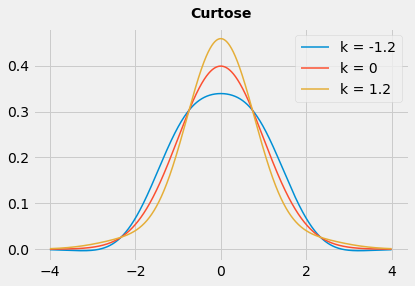

In [10]:
#@title
def plot_normal(mu=0, sigma=1, k=0):
  normal = pd.DataFrame()
  normal['x'] = np.arange(-4, 4, 0.001)
  n = extras.pdf_mvsk([mu,sigma,0,k])
  normal['pdf'] = n(normal['x'])    
  plt.title("Curtose", fontsize=14, fontweight=600, pad=10)
  plt.plot(normal['x'], normal['pdf'], label=f"k = {k}", linewidth=1.5)
  plt.legend()
  
plot_normal(0,1,-1.2)
plot_normal(0,1,0)
plot_normal(0,1,1.2)